## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2020)
Pekka Marttinen, Santosh Hiremath, Marko Järvenpää, Tianyu Cui, Yogesh Kumar, Diego Mesquita, Zheyang Shen, Alexander Aushev, Khaoula El Mekkaoui, Joakim Järvinen.

## Assignment 5, due on Tuesday,  18th February at 23:55.


### Contents
1. [Problem 1: EM for missing observations](#Problem-1:-EM-for-missing-observations)
2. [Problem 2: Extension of 'simple example' from the lecture](#Problem-2:-Extension-of-'simple-example'-from-the-lecture)
3. [Problem 3: PyTorch](#Problem-3:-PyTorch)  


# Problem 1: EM for missing observations
Suppose random variables $X_{i}$ follow a bivariate normal distribution $X_{i}\sim \mathcal{N}_{2}(0,\Sigma)$, where
$ \Sigma = \begin{bmatrix} 1 & \rho\\ \rho & 1 \end{bmatrix} $.

Suppose further that we have observations on $X_{1}=(X_{11},X_{12})^{T}$, $X_{2}=(X_{21},X_{22})^{T}$ and $X_{3}=(X_{31},X_{32})^{T}$, such that
$X_{1}$ and $X_{3}$ are fully observed, and from $X_{2}$ we have observed only
the second coordinate. Thus, our data matrix can be written as

$$
\begin{bmatrix}
x_{11} & x_{12}\\
? & x_{22}\\
x_{31} & x_{32}
\end{bmatrix} 
$$


where the rows correspond to the transposed observations $\mathbf{x}_{1}^{T},\mathbf{x}_{2}^{T},\mathbf{x}_{3}^{T}$. Suppose we want to learn the unknown parameter $\rho$ using the EM-algorithm. Denote the missing observation by $Z$ and derive the E-step of the algorithm, i.e., __(a)__ write the complete data log-likelihood $\ell(\rho)$, __(b)__ compute the posterior distribution of the missing observation, given the observed variables and current estimate for $\rho$, and __(c)__ evaluate the expectation of $\ell(\rho)$ with respect to the posterior distribution of the missing observations.

**Hints**:

1. In general, for $X \sim \mathcal{N}_2(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where $X=(X_1, X_2)^{T}$, $\boldsymbol{\mu}=(\mu_1, \mu_2)^{T}$ and $\boldsymbol{\Sigma} = \begin{pmatrix} 
            \sigma_1^{2} & \rho\sigma_{1}\sigma_{2} \\ 
            \rho\sigma_{1}\sigma_{2} & \sigma_2^{2} 
            \end{pmatrix}$, 
we have 
$$ X_1 \mid X_2 = x_2 \sim \mathcal{N}\left(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1-\rho^2)\sigma_1^{2}\right),$$  with $\rho$ being the correlation coefficient.
2. For evaluating the expectation of $\ell(\rho)$, you can make use of the following two rules: 
    - $\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2} = trace(\boldsymbol{\Sigma}^{-1}\mathbf{x_2x_2^T}).$
    - if $X \sim \mathcal{N}(\mu, \sigma^2)$ then $\langle{X^2}\rangle = \mu^2 + \sigma^2$.
    




### Solution to Problem 1
Write your solution to Problem 1 in LateX or attach a picture here. You can add a picture using the command ```!(imagename_in_folder.jpg)```. 

**(a)**

$$\ell(p)=log\prod_{i=1}^{3}p(x_{i}|p)=\sum_{i=1}^{3}log\;p(x_{i}|p)=\sum_{i=1}^{3}\mathcal{N}_{2}(x_{i}|0,\textstyle\sum)$$

$$\sum_{i=1}^{3}\frac{1}{\sqrt{2\pi det\textstyle\sum}}e^{-\frac{1}{2}(x_{i}-\bar{x_{i}})^{T}\textstyle\sum_{i}^{-1}(x_{i}-\bar{x_{i}})}$$

$$-\frac{1}{2}x_{1}^{T}\textstyle\sum^{-1}x_{1}-\frac{1}{2}x_{2}^{T}\textstyle\sum^{-1}x_{2}-\frac{1}{2}x_{3}^{T}\textstyle\sum^{-1}x_{3}-\frac{3}{2}log(1-\rho)^{2}+constant$$

**(b)**

By using the given formula: 

$$X_1 \mid X_2 = x_2 \sim \mathcal{N}\left(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1-\rho^2)\sigma_1^{2}\right)$$

And recalling that $X_{i}\sim \mathcal{N}_{2}(0,\Sigma)$ and that $\Sigma = \begin{bmatrix} 1 & \rho\\ \rho & 1 \end{bmatrix}$, we can find that:

$$p(Z|X_{22})=\mathcal{N}\left(Z|0+\frac{1}{1}\rho(x_{22}-0),(1-\rho^{2})1^{2}\right)$$

$$\mathcal{N}\left(Z|\rho x_{22},(1-\rho^{2})\right)$$

$$E(Z)=\rho x_{22}, E(Z^{2})=\rho^{2}x_{22}(1-p)^{2}$$

**(c)**

$$Q(\rho,\rho_{0})\equiv E_{Z|x,\rho_{0}}log\;\ell(p)$$

$$E\left(-\frac{1}{2}x_{1}^{T}\textstyle\sum^{-1}x_{1}-\frac{1}{2}x_{2}^{T}\textstyle\sum^{-1}x_{2}-\frac{1}{2}x_{3}^{T}\textstyle\sum^{-1}x_{3}-\frac{3}{2}log(1-\rho)^{2}+constant\right)$$

Where 

$$\left(-\frac{1}{2}x_{2}^{T}\textstyle\sum^{-1}x_{2}+ constant\right)$$ 

$$E\left(trace\left(-\frac{1}{2}\textstyle\sum^{-1}x_{2}x_{2}^{T}\right)+ constant\right)$$

$$-\frac{1}{2}trace\left(\textstyle\sum^{-1}\begin{bmatrix} \sum_{xx} & \sum_{xy}\\ \sum{yx} & \sum_{yy} \end{bmatrix}+ constant\right)$$

$$ -\frac{1}{2}trace\left(\textstyle\sum^{-1}\begin{bmatrix} E(Z^{2}) & E(Z)x_{22}\\ x_{22}E(Z) & x_{22}^{2} \end{bmatrix}+ constant\right)$$

$$ -\frac{1}{2}trace\left(\textstyle\sum^{-1}\begin{bmatrix} \rho^{2}x_{22}(1-p)^{2} & \rho x_{22}\\ \rho x_{22} & x_{22}^{2} \end{bmatrix}+ constant\right)$$

$$ -\frac{1}{2}trace\left(\begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}^{-1} \begin{bmatrix} \rho^{2}x_{22}(1-p)^{2} & \rho x_{22}\\ \rho x_{22} & x_{22}^{2} \end{bmatrix}+ constant\right)$$

$$ -\frac{1}{2}trace\left(\frac{1}{1\times1 - (-\rho)\times(-\rho)}\begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}\begin{bmatrix} \rho^{2}x_{22}(1-p)^{2} & \rho x_{22}\\ \rho x_{22} & x_{22}^{2} \end{bmatrix}+ constant\right)$$

$$ -\frac{1}{2}trace\left(\frac{1}{1-p^{2}}\begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}\begin{bmatrix} \rho^{2}x_{22}(1-p)^{2} & \rho x_{22}\\ \rho x_{22} & x_{22}^{2} \end{bmatrix}+ constant\right)$$

# Problem 2: Extension of 'simple example' from the lecture
Suppose that we have $N$ independent observations $x = ( x_1, \dots, x_N )$ from a two-component mixture of univariate Gaussian distributions with unknown mixing co-efficients and unknown mean of the second component:
$$ p(x_{n} \mid \theta,\tau)=(1-\tau)\mathcal{N}(x_{n}|0,1)+\tau\mathcal{N}(x_{n} \mid \theta,1).$$

**(a)** Write down the complete data log-likelihood and derive the EM-algorithm for learning the maximum likelihood estimates for $\theta$ and $\tau$. 

**(b)** Simulate some data from the model ($N = 100$ samples) with the true values of parameters $\theta$ = 3 and $\tau = 0.5$. Run your EM algorithm to see whether the learned parameters converge close to the true values (by e.g. just listing the estimates from a few iterations or plotting them). Use the code template below (after the answer cell) as a starting point. 

**HINT**: The E and M steps for simple example.pdf from the lecture material looks as follows
```Python
	# E-step: compute the responsibilities r2 for component 2
	r1_unnorm = scipy.stats.norm.pdf(x, 0, 1)
	r2_unnorm = scipy.stats.norm.pdf(x, theta_0, 1)
	r2 = r2_unnorm / (r1_unnorm + r2_unnorm)
	
	# M-step: compute the parameter value that maximizes
	# the expectation of the complete-data log-likelihood.
	theta[it] = sum(r2 * x) / sum(r2)
```






### Solution to Problem 2(a)
Write your solution to Problem 2(a) in LateX or attach a picture here. You can add a picture using the command ```!(imagename_in_folder.jpg)```. 

**(a)**

The observation $x_{n}$ is generated from the first component with the probability $(1-\tau)$ and from the second component with the probability of $\tau$

$$z\sim Multinomial((1-\tau),\tau)^{T}$$

$$x|z_{1}=(1,0)^{T} \sim \mathcal{N}(x_{n}|0,1)$$

$$x|z_{2}=(0,1)^{T} \sim \mathcal{N}(x_{n}|\theta,1)$$

In the EM-algorithm we will maximize the expectation of the log-likelihood of the complete data (x,z):

$$p(x, z|\theta,\tau) = log\Bigg\{\prod_{n=1}^{N}p(x_{n},z_{n}|\theta, \tau)\Bigg\} = \sum_{n=1}^{N}log\;p(x_{n},z_{n}|\theta, \tau)$$

$$\sum_{n=1}^{N}[(1-\tau)^{z_{n1}} \times \mathcal{N}(x_{n}|0,1)^{z_{n1}} \times \tau^{z_{n2}}\times \mathcal{N}(x_{n}|\theta,1)^{z_{n2}}]$$

$$\sum_{n=1}^{N}\big\{z_{n1}log[\mathcal{N}(x_{n}|0,1)] + z_{n2}log[\mathcal{N}(x_{n}|\theta,1)] + z_{n1}log(1-\tau) + z_{n2}log\tau\big\}$$

$E-step 1^{0}:$ Compute the posterior distribution of the latent variables, given current estimates $\theta_{0}$ and $\tau_{0}$

$$\gamma(z_{n2})\equiv p(z_{n2}=1|x_{n},\theta_{0}, \tau_{0})=\frac{\tau\mathcal{N}(x_{n}|\theta_{0},1)}{(1-\tau_{0})\mathcal{N}(x_{n}|0,1) + \tau_{0}\mathcal{N}(x_{n}|\theta_{0},1)}$$

$E-step 2^{0}:$ Evaluate the expectation of the complete data log-likelihood over the posterior distribution of the latent variables

$$Q(\theta,\theta_{0},\tau,\tau_{0}) = E_{z|x,\theta_{0},\tau_{0}}[log\;p(x,z|\theta,\tau)]$$

$$\sum_{n=1}^{N}\big\{E[z_{n1}log[\mathcal{N}(x_{n}|0,1)]+E[z_{n2}log[\mathcal{N}(x_{n}|\theta,1)]+E[z_{n1}log(1-\tau)] + E[z_{n2}log\tau]\big\}$$

$$\sum_{n=1}^{N}\big\{[(1-\gamma(z_{n1})]log[\mathcal{N}(x_{n}|0,1)]+\gamma(z_{n2})log[\mathcal{N}(x_{n}|\theta,1)]+[(1-\gamma(z_{n1})]log(1-\tau) + \gamma(z_{n2})log\tau\big\}$$

$M-step - maximize Q(\theta,\theta_{0},\tau,\tau_{0})$ with respect to $\theta$,$\tau$ by taking the derivative with respect to (1) $\theta$ and (2) $\tau$

$$\;\; \frac{d}{d\theta}Q(\theta,\theta_{0},\tau,\tau_{0}) = \frac{d}{d\theta}\sum_{n=1}^{N}\big\{[(1-\gamma(z_{n1})]log[\mathcal{N}(x_{n}|0,1)]+\gamma(z_{n2})log[\mathcal{N}(x_{n}|\theta,1)]+[(1-\gamma(z_{n1})]log(1-\tau) + \gamma(z_{n2})log\tau\big\}$$

(1) Set $\frac{d}{d\theta}Q(\theta,\theta_{0},\tau,\tau_{0}) = 0$ we get:

$$\theta = \frac{\sum_{n=1}^{N}\gamma(z_{n2})x_{n}}{\sum_{n=1}^{N}\gamma(z_{n2})}$$

$$\frac{1}{N_{2}}\sum_{n=1}^{N}\gamma(z_{n2})x_{n}$$

Where $N_{2}$ is defined as $\sum_{n=1}^{N}\gamma(z_{n2})$, which is the effective number of observations assigned to component 2

(2) Set $\frac{d}{d\tau}Q(\theta,\theta_{0},\tau,\tau_{0}) = 0$ we get:

$$\sum_{n=1}^{N}\gamma(z_{n2})+\tau\lambda = N_{2}+\tau\lambda$$

Taking into account that the mixing coefficients (probabilities) $\tau$ sum up to 1: $\sum_{n=1}^{N}\tau_{n}=1$ and that $\tau_{n}\geq0\;\;\forall\;\tau_{n}$, and by utilizing the Lagrange multiplier $\lambda$, we eventually find that $\lambda$ = $-N$. Thus,

$$\tau = \frac{N_{2}}{N}$$



theta       tau
1.0000000  0.1000000
2.6157647  0.6743498
3.1118685  0.5926984
3.2068086  0.5654052
3.2238128  0.5601163
3.2268286  0.5591647
3.2273626  0.5589957
3.2274572  0.5589658
3.2274739  0.5589605
3.2274769  0.5589596
3.2274774  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594
3.2274775  0.5589594


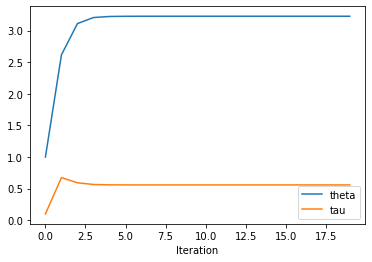

In [1]:
# template for Problem 2(b)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


### Simulate data:

np.random.seed(0)

theta_true = 3
tau_true = 0.5
n_samples = 100

x = np.zeros(n_samples)
for i in range(n_samples):
    # Sample from N(0,1) or N(theta_true,1)
    if np.random.rand() < 1 - tau_true:
        x[i] = np.random.normal(0, 1)
    else:
        x[i] = np.random.normal(theta_true, 1)


### The EM algorithm:

n_iter = 20
theta = np.zeros(n_iter)
tau = np.zeros(n_iter)

# Initial guesses for theta and tau
theta[0] = 1
tau[0] = 0.1

for it in range(1, n_iter):
    # The current estimates for theta and tau,
    # computed in the previous iteration
    theta_0 = theta[it-1]
    tau_0 = tau[it-1]

    # E-step: compute the responsibilities r1 and r2
    # r1 = ?
    # r2 = ?
    
    # YOUR CODE HERE
    try:
        r1_unnorm = scipy.stats.norm.pdf(x, 0, 1)
        r2_unnorm = scipy.stats.norm.pdf(x, theta_0, 1)
        ri = r1_unnorm / (r1_unnorm + r2_unnorm)
        r2 = r2_unnorm / (r1_unnorm + r2_unnorm)
    except:
        raise NotImplementedError()

    # M-step: compute the parameter values that maximize
    # the expectation of the complete-data log-likelihood.
    # theta[it] = ?
    # tau[it] = ?
    
    # YOUR CODE HERE
    try:
        theta[it] = sum(r2 * x) / sum(r2)
        tau[it] = sum(r2) / len(r2)
    except:
        raise NotImplementedError()
    

# Print and plot the values of theta and tau in each iteration
print("theta       tau")
for theta_i, tau_i in zip(theta, tau):
    print("{0:.7f}  {1:.7f}".format(theta_i, tau_i))

plt.plot(range(n_iter), theta, label = 'theta')
plt.plot(range(n_iter), tau, label = 'tau')
plt.xlabel('Iteration')
plt.legend()
plt.show()

### Problem 3: PyTorch
Go through the PyTorch tutorials in the three links and answer the questions given below

1) What is PyTorch: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

2) Autograd: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

3) Linear regression with PyTorch: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py

__(a)__ What are PyTorch Tensors and how do you run a CPU tensor on GPU? 


__(b)__ What is Automatic differentiation and autograd? 


__(c)__ PyTorch constructs the computation graph dynamically as the operations are defined. In the 'linear regression with PyTorch' tutorial which line numbers indicates the completion of the computation graph, computation of the gradients and update of the weights, respectively? 






### Solution to Problem 3
Write your solution to Problem 3 here.

**(a)**

PyTorch Tensors are core building blocks of the Python-based scientific progamming package PyTorch. PyTorch Tensors are similar to NumPy's ndarrays with the exception that they can take benefit of parallel computation capabilities of GPU to improve computing. To run CPU tensor on GPU, one can move CPU tensors in and out of GPU by using ```torch.device``` object:

```C++
   device=torch.device('cuda'))
   device=torch.device('cpu'))
```

Or more concisely:

```C++
   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
```

**(b)**

Autograd is a package that is central to all neural networks in Pytorch. The autograd package provides means for automatic differentation of arbitrary scalar valued functions executed either on CPU or GPU, such as loss functions. Autograd can be used for gradient computation with the tensor keyword ```requires_grad=True```. When this keyword is set for arbitraty number of tensors, autograd computes the sum of gradients of given tensors w.r.t. graph leaves by utilizing the chain rule. In case of any non-scalar tensors that require gradient computation, the autograd package computes the Jacobian-vector product. Furthermore, Autograd also creates an acyclic graph called the dynamic computational graph from all operations (functions) performed on gradient enabled tensors. 

**(c)**

- Completion of the computation graph: lines _30-42_

- Computation of the gradients: _line 41_

- Update of the weights: _line 42_